Elit Jasmine Dogu (ejd5mm)       
DS 5001    
5 May 2021    
*Third year, Undergraduate Student*     



# What This File Contains:
- Using SciKit Learn to Analyze Same Things as File5
- Get TFIDF From BOW
- Create a Normalized Table
- LDA With SciKit Learn
    - Convert Token Back to Doc Table
    - Generating Model
    - Looking at Theta
- Compute Topic Entropy Over Terms
- Compute Doc Entropy Over Topics
- Inspect Results
    - Create Topics and Get Top Words Per Topic
- Look at Most Frequently Appearing Terms
- Sort Topics by Doc Weight
- Generate Word Embedding with Gensim Library

In [1]:
import dill
dill.load_session('notebook_env_file5.db') #loading in all of the tables and everything in the environment of File5.ipynb

In [2]:
#imports 

import pandas as pd
from nltk.tokenize import word_tokenize
import numpy as np
import plotly.express as px
import re
import seaborn as sns
from glob import glob
from numpy.linalg import norm
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import nltk
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as pla

In [3]:
#creating subdirectories
data_in = './data_in'
#data_in_lf ='./data_out/file5' 
data_out = './data_out/file6'

## Comparing to SciKit Learn

In [4]:
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
F1 = TOKEN_NLTK_ANNOTATED.dropna().groupby(DOC).term_str.apply(' '.join) #converted back to document strings 

tfidf_engine = TfidfVectorizer(lowercase=True, stop_words='english') #feed to tfidf engine, apply that engine to the model
tfidf_model = tfidf_engine.fit_transform(F1)

In [6]:
DTM = pd.DataFrame(tfidf_model.toarray(), columns=tfidf_engine.get_feature_names())
DTM.index.name = 'doc_id'

In [7]:
DTM.T.sort_values(0, ascending=False).iloc[:20, :10]\
    .style.background_gradient(cmap='GnBu')


#this is a document term matrix (vector space)
#documents on the horizontal axxis 
#chapters, 

doc_id,0,1,2,3,4,5,6,7,8,9
vulnerable,0.476555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
younger,0.454508,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
advice,0.454508,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
father,0.383860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
gave,0.335035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
years,0.316453,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
primary,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
precisely,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
present,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
presence,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
DTM.mean().sort_values(ascending=False).head(20)

gatsby    0.015491
said      0.014236
tom       0.011439
daisy     0.011379
like      0.008496
know      0.008217
man       0.007882
came      0.007439
don       0.007360
just      0.007142
little    0.006992
come      0.006795
time      0.006672
went      0.006513
house     0.006487
didn      0.006476
got       0.006336
car       0.006276
eyes      0.006200
mr        0.006056
dtype: float64

In [9]:
DTM.to_csv('{}/Great-Gatsby-DOCUMENT-TERM-MATRIX.csv'.format(data_out))

## Get TFIDF from BOW

In [10]:
TFIDF = BOW.tfidf_bool.unstack(fill_value=0) #create term frequency


In [11]:
TFIDF #selected one of the columns, have a matrix  

term_str                      12  158th  1902  1906  1915  1919  1922  300  \
chap_num para_num                                                            
1        0         0.000000  0.0    0.0   0.0   0.0   0.0   0.0   0.0  0.0   
         1         0.011568  0.0    0.0   0.0   0.0   0.0   0.0   0.0  0.0   
         2         0.012620  0.0    0.0   0.0   0.0   0.0   0.0   0.0  0.0   
         3         0.010679  0.0    0.0   0.0   0.0   0.0   0.0   0.0  0.0   
         4         0.027764  0.0    0.0   0.0   0.0   0.0   0.0   0.0  0.0   
...                     ...  ...    ...   ...   ...   ...   ...   ...  ...   
9        494       0.011568  0.0    0.0   0.0   0.0   0.0   0.0   0.0  0.0   
         495       0.011568  0.0    0.0   0.0   0.0   0.0   0.0   0.0  0.0   
         496       0.000000  0.0    0.0   0.0   0.0   0.0   0.0   0.0  0.0   
         497       0.010679  0.0    0.0   0.0   0.0   0.0   0.0   0.0  0.0   
         498       0.046274  0.0    0.0   0.0   0.0   0.0   0.0   0.0  0.0   

term_str           33rd  ...  youdo  young   younger  youngerwith  your  \
chap_num para_num        ...                                              
1        0          0.0  ...    0.0    0.0  0.933434          0.0   0.0   
         1          0.0  ...    0.0    0.0  0.000000          0.0   0.0   
         2          0.0  ...    0.0    0.0  0.000000          0.0   0.0   
         3          0.0  ...    0.0    0.0  0.000000          0.0   0.0   
         4          0.0  ...    0.0    0.0  0.000000          0.0   0.0   
...                 ...  ...    ...    ...       ...          ...   ...   
9        494        0.0  ...    0.0    0.0  0.000000          0.0   0.0   
         495        0.0  ...    0.0    0.0  0.000000          0.0   0.0   
         496        0.0  ...    0.0    0.0  0.000000          0.0   0.0   
         497        0.0  ...    0.0    0.0  0.000000          0.0   0.0   
         498        0.0  ...    0.0    0.0  0.000000          0.0   0.0   

term_str           yours  yourself  youth  youwhy  yukon  
chap_num para_num                                         
1        0           0.0       0.0    0.0     0.0    0.0  
         1           0.0       0.0    0.0     0.0    0.0  
         2           0.0       0.0    0.0     0.0    0.0  
         3           0.0       0.0    0.0     0.0    0.0  
         4           0.0       0.0    0.0     0.0    0.0  
...                  ...       ...    ...     ...    ...  
9        494         0.0       0.0    0.0     0.0    0.0  
         495         0.0       0.0    0.0     0.0    0.0  
         496         0.0       0.0    0.0     0.0    0.0  
         497         0.0       0.0    0.0     0.0    0.0  
         498         0.0       0.0    0.0     0.0    0.0  

[4709 rows x 6152 columns]

In [12]:
TFIDF.to_csv('{}/Great-Gatsby-TFIDF.csv'.format(data_out))

## Create Normalized Table

In [13]:
L0 = TFIDF.astype('bool').astype('int') # Binary (Pseudo L) ##tfidf into binart (present or absent)
L1 = TFIDF.apply(lambda x: x / x.sum(), 1) # Probabilistic ##weights divided by sum, want it to behave like a probability distribution
L2 = TFIDF.apply(lambda x: x / norm(x), 1) # Pythagorean normalization ##used to normalize euclidian

In [14]:
((L2.T)**2).sum()

chap_num  para_num
1         0           1.0
          1           1.0
          2           1.0
          3           1.0
          4           1.0
                     ... 
9         494         1.0
          495         1.0
          496         1.0
          497         1.0
          498         1.0
Length: 4709, dtype: float64

## LDA with SciKit Learn


In [15]:
ngram_range = [1,2]
n_terms = 4000
n_topics = 40
max_iter = 20
n_top_terms = 9

In [16]:
OHCO = ['book_id', 'chap_num', 'para_num']
PARA = OHCO[:3]
CHAP = OHCO[:2]
BOOK = OHCO[:1]

In [17]:
BAG= CHAP

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

## Convert TOKEN Back to DOC

In [19]:
TOKEN_NLTK_ANNOTATED['book_id'] = 'Great Gatsby'

In [20]:
DOCS = TOKEN_NLTK_ANNOTATED[TOKEN_NLTK_ANNOTATED.pos.str.match(r'^NNS?$')]\
    .groupby(BAG).term_str\
    .apply(lambda x: ' '.join(x))\
    .to_frame()\
    .rename(columns={'term_str':'doc_str'})

In [21]:
DOCS.head()

doc_str
book_id      chap_num                                                   
Great Gatsby 1         years father advice mind anyone  people world ...
             2         halfway motor road railroad quarter mile area ...
             3         music s house summer nights blue gardens men g...
             4         morning church bells villages world mistress s...
             5         home night moment house fire  clock corner pen...

In [22]:
DOCS.to_csv('{}/Great-Gatsby-TOKEN-TO-DOCS.csv'.format(data_out))

### Creating Vector Space

In [23]:
count_engine = CountVectorizer(max_features=n_terms, ngram_range=ngram_range, stop_words='english')
count_model = count_engine.fit_transform(DOCS.doc_str)
TERMS = count_engine.get_feature_names()

### Generating Model

In [24]:
lda_engine = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

### Theta

In [25]:
THETA = pd.DataFrame(lda_engine.fit_transform(count_model), index=DOCS.index)
THETA.columns.name = 'topic_id'

In [26]:
THETA.head()

topic_id                     0         1         2         3         4   \
book_id      chap_num                                                     
Great Gatsby 1         0.000021  0.000021  0.000021  0.000021  0.000021   
             2         0.000029  0.000029  0.000029  0.000029  0.000029   
             3         0.000019  0.000019  0.000019  0.000019  0.000019   
             4         0.000024  0.000024  0.000024  0.000024  0.000024   
             5         0.000026  0.000026  0.000026  0.000026  0.000026   

topic_id                     5         6         7         8         9   ...  \
book_id      chap_num                                                    ...   
Great Gatsby 1         0.000021  0.000021  0.000021  0.000021  0.000021  ...   
             2         0.000029  0.000029  0.000029  0.000029  0.000029  ...   
             3         0.000019  0.000019  0.000019  0.000019  0.000019  ...   
             4         0.000024  0.000024  0.000024  0.000024  0.000024  ...   
             5         0.000026  0.000026  0.000026  0.000026  0.000026  ...   

topic_id                     30        31        32        33        34  \
book_id      chap_num                                                     
Great Gatsby 1         0.000021  0.000021  0.000021  0.000021  0.000021   
             2         0.000029  0.000029  0.000029  0.000029  0.000029   
             3         0.000019  0.000019  0.000019  0.000019  0.000019   
             4         0.000024  0.000024  0.000024  0.000024  0.000024   
             5         0.000026  0.000026  0.000026  0.000026  0.000026   

topic_id                     35        36        37        38        39  
book_id      chap_num                                                    
Great Gatsby 1         0.000021  0.000021  0.000021  0.000021  0.000021  
             2         0.000029  0.000029  0.000029  0.000029  0.000029  
             3         0.000019  0.000019  0.000019  0.999242  0.000019  
             4         0.000024  0.000024  0.000024  0.000024  0.000024  
             5         0.000026  0.000026  0.000026  0.000026  0.000026  

[5 rows x 40 columns]

In [27]:
THETA.to_csv('{}/Great-Gatsby-THETA.csv'.format(data_out))

In [28]:
THETA.style.background_gradient( high=.5)

In [29]:
PHI = pd.DataFrame(lda_engine.components_, columns=TERMS)
PHI.index.name = 'topic_id'
PHI.columns.name  = 'term_str'

In [30]:
PHI.T.sample(10).style.background_gradient(cmap='GnBu', high=.5)

topic_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
term_str,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
moment feet,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,1.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
man man,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,2.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
mattertomorrow arms,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,1.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
halt,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,2.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,1.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
men pebbles,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,1.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
time decision,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,1.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
rest evening,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,1.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
violent racket,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,1.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
roses motorboat,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,1.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000


## Compute Topic Entropy Over Terms

In [31]:
PHI_P = (PHI.T / PHI.T.sum())
PHI_I = np.log2(1/PHI_P)
TOPIC_H = round((PHI_I * PHI_P).sum().sort_values(ascending=False), 2)

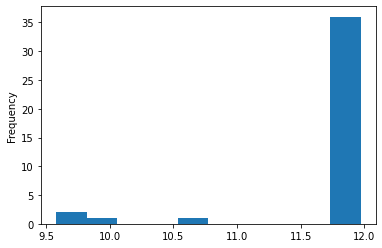

In [32]:
TOPIC_H.plot.hist();

## Compute DOC Entropy Over Topics

In [33]:
THETA_I = np.log2(1/THETA.T)
DOC_H = (THETA_I * THETA.T).sum()

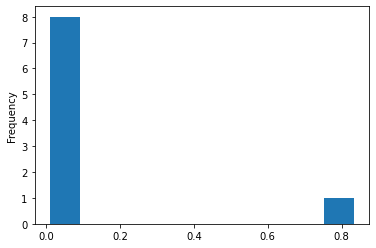

In [34]:
DOC_H.plot.hist();

## Inspect Results
### Create Topics and Get Top Words Per Topic

In [35]:
TOPICS = PHI.stack().to_frame().rename(columns={0:'topic_weight'})\
    .groupby('topic_id')\
    .apply(lambda x: 
        x.sort_values('topic_weight', ascending=False)\
               .head(n_top_terms)\
               .reset_index()\
               .drop('topic_id',1)['term_str'])

In [36]:
TOPICS[[t for t in range(n_top_terms)]]

term_str,0,1,2,3,4,5,6,7,8
topic_id,,,,,,,,,
0,abounding,request garden,reporter morning,reports,reports morning,reports nightmaregrotesque,reproach,reproach door,reproachbut
1,abounding,request garden,reporter morning,reports,reports morning,reports nightmaregrotesque,reproach,reproach door,reproachbut
2,abounding,request garden,reporter morning,reports,reports morning,reports nightmaregrotesque,reproach,reproach door,reproachbut
3,abounding,request garden,reporter morning,reports,reports morning,reports nightmaregrotesque,reproach,reproach door,reproachbut
4,abounding,request garden,reporter morning,reports,reports morning,reports nightmaregrotesque,reproach,reproach door,reproachbut
5,abounding,request garden,reporter morning,reports,reports morning,reports nightmaregrotesque,reproach,reproach door,reproachbut
6,abounding,request garden,reporter morning,reports,reports morning,reports nightmaregrotesque,reproach,reproach door,reproachbut
7,abounding,request garden,reporter morning,reports,reports morning,reports nightmaregrotesque,reproach,reproach door,reproachbut
8,abounding,request garden,reporter morning,reports,reports morning,reports nightmaregrotesque,reproach,reproach door,reproachbut


## Most Frequently Appearing Terms

In [37]:
TOPICS.stack().to_frame('term').value_counts().to_frame('n').head(5)#.sort_values('n')#.plot.barh(figsize=(5,15))

,n
term,
abounding,36
request garden,36
reports morning,36
reports nightmaregrotesque,36
reproach,36


In [38]:
TOPICS['label'] = TOPICS.apply(lambda x: str(x.name) + ' ' + ', '.join(x[:n_top_terms]), 1)

## Sort Topics by DOC Weight

In [39]:
TOPICS['doc_weight_sum'] = THETA.sum()

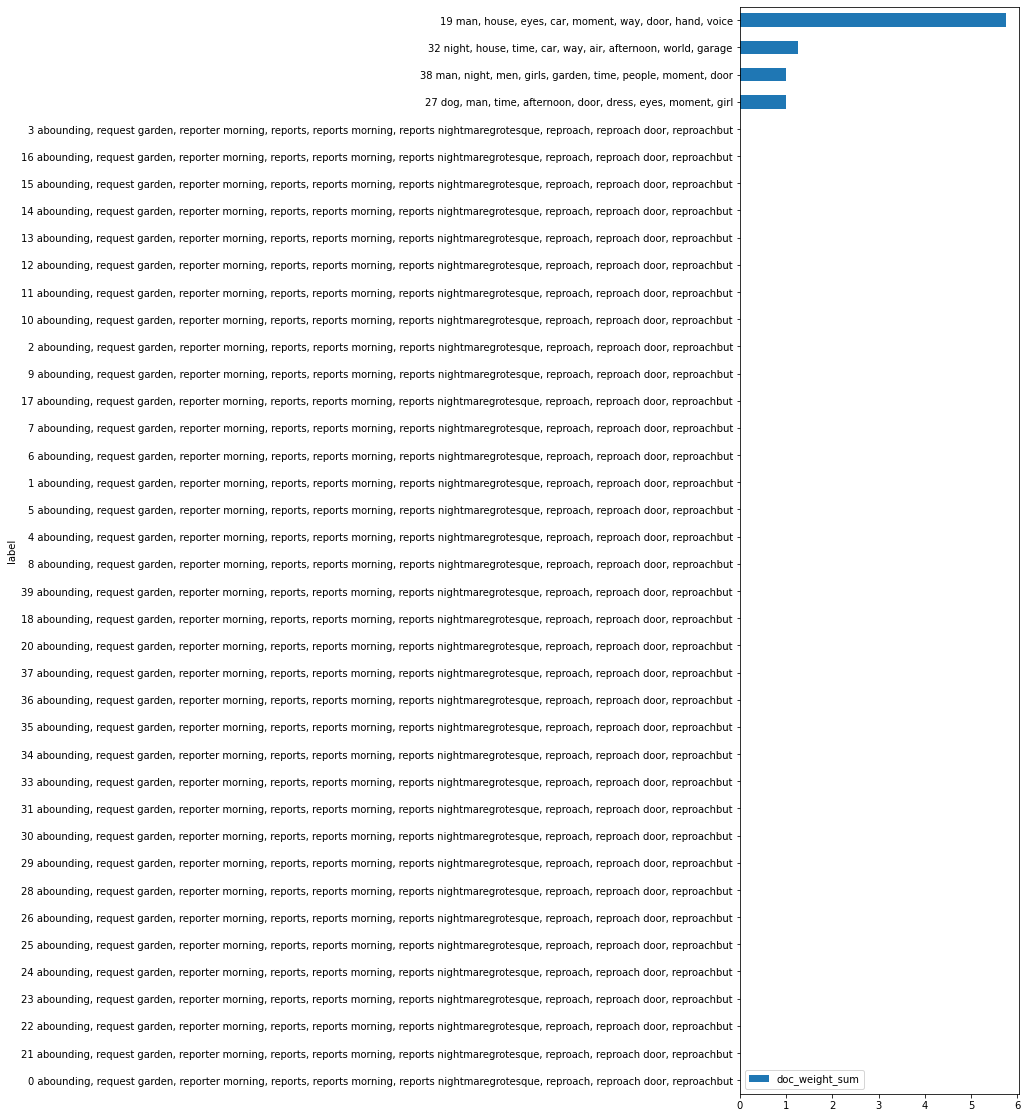

In [40]:
TOPICS.sort_values('doc_weight_sum', ascending=True).plot.barh(y='doc_weight_sum', x='label', figsize=(5,n_topics/2));

In [41]:
from gensim.models import word2vec
from sklearn.manifold import TSNE
import plotly_express as px

In [42]:
GATSBY_DOCS = TOKEN_NLTK_ANNOTATED\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()
GATSBY_DOCS = [doc for doc in GATSBY_DOCS if len(doc) > 1]

In [43]:
w2v_params2 = dict(
    window = 5,
    vector_size = 246,
    min_count = 80,
    workers = 4
)

## Continuing to Generate Word Embedding with Gensim Library


In [44]:
gatsby = word2vec.Word2Vec(GATSBY_DOCS, **w2v_params2)

In [45]:
#tSNE 
coords2 = pd.DataFrame(
    dict(
        vector = [gatsby.wv.get_vector(w) for w in gatsby.wv.key_to_index.values()], 
        term_str = gatsby.wv.index_to_key
    )).set_index('term_str')

In [46]:
tsne_engine2 = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_model2 = tsne_engine2.fit_transform(coords2.vector.to_list())
coords2['x'] = tsne_model2[:,0]
coords2['y'] = tsne_model2[:,1]

In [47]:
VOCAB4

,term_id,n,num,stop,stem_porter,stem_snowball,stem_lancaster,pos_max,dpidp,dfidf,...,zipf_k,zipf_y,tfidf_n_sum,tfidf_jp_sum,tfidf_cp_sum,tfidf_l2_sum,tfidf_logn_sum,tfidf_sub_sum,tfidf_max_sum,tfidf_bool_sum
term_str,,,,,,,,,,,,,,,,,,,,,
,0,11722,0,0,,,,.,0.000000,0.000000,...,11722,4721.020000,0.002281,0.002500,0.002500,0.002004,0.001464,0.001724,0.001190,0.001306
the,5406,2379,0,1,the,the,the,DT,0.000000,0.000000,...,4758,2360.510000,0.004597,0.004858,0.004858,0.004889,0.004292,0.004557,0.004328,0.003962
and,212,1529,0,1,and,and,and,CC,0.000000,0.000000,...,4587,1573.673333,0.003972,0.003971,0.003971,0.004160,0.003883,0.003975,0.004001,0.003551
a,19,1394,0,1,a,a,a,DT,0.000000,0.000000,...,5576,1180.255000,0.003845,0.003699,0.003699,0.003899,0.003785,0.003864,0.003841,0.003431
i,2720,1376,0,1,i,i,i,PRP,0.000000,0.000000,...,6880,944.204000,0.004035,0.003614,0.003614,0.003590,0.003845,0.004009,0.003436,0.003449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
threecornered,5449,1,0,0,threecorn,threecorn,threecornered,JJ,0.352214,3.169925,...,6148,0.767895,0.000000,0.000010,0.000010,0.000015,0.000000,0.000000,0.000014,0.000005
addresses,89,1,0,0,address,address,address,NNS,0.352214,3.169925,...,6149,0.767770,0.000000,0.000007,0.000007,0.000010,0.000000,0.000000,0.000004,0.000004
threadbare,5447,1,0,0,threadbar,threadbar,threadbare,JJ,0.352214,3.169925,...,6150,0.767646,0.000000,0.000010,0.000010,0.000013,0.000000,0.000000,0.000006,0.000007


In [48]:
coords2.head()

,vector,x,y
term_str,,,
,"[-0.057209753, 0.03197983, 0.0029625958, 0.133...",-0.014112,1.190645
the,"[0.10264369, -0.11885073, -0.055199295, 0.0076...",0.234188,-9.687896
and,"[0.096899085, -0.10997028, -0.049776778, 0.012...",0.247033,-9.555822
a,"[0.076812685, -0.0948294, -0.04307447, 0.02831...",0.123862,-8.327204
i,"[0.05206912, -0.07127877, -0.045106124, 0.0612...",-0.442118,-0.487415


In [49]:
tsne_model2

array([[-1.41119212e-02,  1.19064474e+00],
       [ 2.34187737e-01, -9.68789577e+00],
       [ 2.47032672e-01, -9.55582237e+00],
       [ 1.23862274e-01, -8.32720375e+00],
       [-4.42118466e-01, -4.87414658e-01],
       [-1.16331613e+00, -2.75503135e+00],
       [ 3.54411989e-01, -9.53552628e+00],
       [-4.04424012e-01, -3.74281979e+00],
       [ 1.03232288e+00, -8.04982471e+00],
       [ 1.62624407e+00, -8.25696468e+00],
       [-1.25800145e+00, -7.29003954e+00],
       [-6.35933638e-01, -3.17110085e+00],
       [-1.24495633e-01,  7.45737016e-01],
       [-3.11656177e-01, -7.85111189e+00],
       [ 5.38617730e-01, -3.96928072e-01],
       [-6.60358787e-01, -8.66424656e+00],
       [-5.83126009e-01,  2.77865440e-01],
       [ 8.29801083e-01, -9.40455139e-01],
       [-1.67779624e+00, -6.97303247e+00],
       [-7.49018610e-01, -7.17447615e+00],
       [-6.32723212e-01, -8.34216022e+00],
       [ 1.55014539e+00, -7.20002079e+00],
       [ 1.19575143e-01, -1.99009442e+00],
       [-1.

In [50]:
coords2.values

array([[array([-0.05720975,  0.03197983,  0.0029626 ,  0.13366881, -0.1158485 ,
               -0.09959752,  0.0980779 ,  0.19220899, -0.02576417, -0.04557519,
                0.22857675, -0.0306609 , -0.11294688,  0.1088208 ,  0.00483196,
                0.00224414,  0.07897243,  0.12541187, -0.19846624, -0.32823315,
                0.07671501, -0.09024373,  0.09377851,  0.03006021,  0.04593219,
               -0.205146  , -0.01085884,  0.18747324, -0.05464543,  0.05422091,
               -0.08113418, -0.03884634,  0.1731984 , -0.1510919 , -0.05066549,
               -0.11890044,  0.18137552, -0.04890129,  0.06496207, -0.04698278,
               -0.22654934,  0.22120892, -0.11206425, -0.03047778, -0.04134786,
               -0.09512362,  0.02539384,  0.07117143,  0.30269322,  0.28311256,
               -0.04414658,  0.17275065, -0.15367715,  0.03967936, -0.0437868 ,
                0.03492972,  0.25210366, -0.20478548, -0.25258833,  0.30651096,
               -0.08289064, -0.08363897,

In [51]:
VOCAB4.to_csv('{}/Great-Gatsby-FINALVOCAB.csv'.format(data_out))

In [ ]:
dill.dump_session('notebook_env_file6.db')